# Data from the web

In [2]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
%matplotlib inline

import time

# How to get Data


When we do a little retro engenering on web sites(debug mode firefox) :  www.topuniversities.com and www.timeshighereducation.com we can see that both load a json file with all data that we want.So In this homework we will load the json and do a Data analysis.



# QS World University Ranking :  www.topuniversities.com

If we look at : https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt

We have ala the data in json format.

Firstely Download the json :

In [3]:
url = "https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt"
r =  requests.get(url)
print(r.status_code)


200


In [4]:
# now we intrepere the json and put it in a DATAFRAME
import json
from io import StringIO
json = json.load(StringIO(r.text))
dataQS =pd.DataFrame(json['data'])


In [5]:
# drop some data not very useful
dataQS.drop("logo",axis=1,inplace=True)
dataQS.drop("guide",axis=1,inplace=True)
dataQS.drop("stars",axis=1,inplace=True)
dataQS.drop("core_id",axis=1,inplace=True)
dataQS.head()

,cc,country,nid,rank_display,region,score,title,url
0,US,United States,294850,1,North America,100,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,US,United States,297282,2,North America,98.7,Stanford University,/universities/stanford-university
2,US,United States,294270,3,North America,98.4,Harvard University,/universities/harvard-university
3,US,United States,294562,4,North America,97.7,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,GB,United Kingdom,294561,5,Europe,95.6,University of Cambridge,/universities/university-cambridge


Great we have inforamtion about univerty and the url of their page.Now we go on page of each university and get number of student,staff, and internationals.

Note we only keep 200 university of dataframe, otherwise the scrit is too long!!!

In [6]:
# Only get 200 TOP university
# we dont use rank because some time therire are =
dataQS.score = pd.to_numeric(dataQS.score)
dataQS = dataQS.nlargest(200, 'score')

In [7]:

#TODO : use ascyc for eficiency
import asyncio

def getnumber(soup,mainclass):
    """ Get the number in div class mainclass in the dom of html page"""
    mainclass_div = soup.findAll('div',{"class":mainclass})
    # if mainclass not found , number ==0
    if(len(mainclass_div)==0):
        return 0
    else :
        return int(mainclass_div[0].findAll("div",{"class":"number"})[0].text.replace(",",""))

def setnumber(index,url):
    url_univ = 'https://www.topuniversities.com/'+url
    print(index,url)
    # get the page of the univertisy
    r =  requests.get(url_univ)
    soup = BeautifulSoup(r.text, 'html.parser')
    # we get number of student , teaccher and international staff and student 
    return [ (index,"number of students", getnumber(soup,"students-main")),
    (index,"number of international students", getnumber(soup,"int-students-main")),
    (index,"number of faculty members", getnumber(soup,"total faculty")),
    (index,"number of international faculty members",getnumber(soup,"inter faculty"))]
    
async def main():
    loop = asyncio.get_event_loop()
    futures = [
        loop.run_in_executor(
            None, 
            setnumber, 
            index,
            url
        )
        for index,url in zip(dataQS.index, dataQS["url"])
    ]
    for response in await asyncio.gather(*futures):
        for tuble in response : 
            dataQS.set_value(*tuble)
    
dataQS["number of students"] = 0
dataQS["number of international students"]= 0
dataQS["number of faculty members"] = 0
dataQS["number of international faculty members"] = 0
#loop = asyncio.get_event_loop()
#loop.run_until_complete(main())
for index,url in zip(dataQS.index, dataQS["url"]):
     for tuble in setnumber(index,url) :
            dataQS.set_value(*tuble)

dataQS.head()

0 /universities/massachusetts-institute-technology-mit
1 /universities/stanford-university
2 /universities/harvard-university
3 /universities/california-institute-technology-caltech
4 /universities/university-cambridge
5 /universities/university-oxford
6 /universities/ucl-university-college-london
7 /universities/imperial-college-london
8 /universities/university-chicago
9 /universities/eth-zurich-swiss-federal-institute-technology
10 /universities/nanyang-technological-university-singapore-ntu
11 /universities/ecole-polytechnique-f%C3%A9d%C3%A9rale-de-lausanne-epfl
12 /universities/princeton-university
13 /universities/cornell-university
14 /universities/national-university-singapore-nus
15 /universities/yale-university
16 /universities/johns-hopkins-university
17 /universities/columbia-university
18 /universities/university-pennsylvania
19 /universities/australian-national-university
20 /universities/duke-university
21 /universities/university-michigan
22 /universities/kings-college-

188 /universities/university-reading
189 /universities/indian-institute-science-iisc-bangalore
190 /universities/university-cape-town
191 /universities/keio-university-cems-mim
192 /universities/scuola-normale-superiore-di-pisa
193 /universities/scuola-superiore-santanna-pisa-di-studi-universitari-e-di-perfezionamento
194 /universities/texas-am-university
195 /universities/stockholm-university
196 /universities/universitat-aut%C3%B2noma-de-barcelona
197 /universities/instituto-tecnol%C3%B3gico-y-de-estudios-superiores-de-monterrey
198 /universities/maastricht-university
199 /universities/universidad-de-chile


,cc,country,nid,rank_display,region,score,title,url,number of students,number of international students,number of faculty members,number of international faculty members
0,US,United States,294850,1,North America,100.0,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...,11067,3717,2982,1679
1,US,United States,297282,2,North America,98.7,Stanford University,/universities/stanford-university,15878,3611,4285,2042
2,US,United States,294270,3,North America,98.4,Harvard University,/universities/harvard-university,22429,5266,4350,1311
3,US,United States,294562,4,North America,97.7,California Institute of Technology (Caltech),/universities/california-institute-technology-...,2255,647,953,350
4,GB,United Kingdom,294561,5,Europe,95.6,University of Cambridge,/universities/university-cambridge,18770,6699,5490,2278


## Ratio of faculty member and internationastudent 

To get the ratio we divide the number found in last step.

In [9]:
dataQS['Students:Staff Ratio'] = dataQS['number of students'] / dataQS['number of faculty members']
dataQS['Students international:Students Ratio'] = dataQS['number of international students'] / dataQS['number of students'] 





Show best stutend/staff ratio

In [10]:
dataQS.sort_values('Students:Staff Ratio', ascending=True).head(5)

,cc,country,nid,rank_display,region,score,title,url,number of students,number of international students,number of faculty members,number of international faculty members,Students:Staff Ratio,Students international:Students Ratio
3,US,United States,294562,4,North America,97.7,California Institute of Technology (Caltech),/universities/california-institute-technology-...,2255,647,953,350,2.366212,0.286918
15,US,United States,297177,16,North America,90.4,Yale University,/universities/yale-university,12402,2469,4940,1708,2.510526,0.199081
5,GB,United Kingdom,294654,6,Europe,95.3,University of Oxford,/universities/university-oxford,19720,7353,6750,2964,2.921481,0.372870
4,GB,United Kingdom,294561,5,Europe,95.6,University of Cambridge,/universities/university-cambridge,18770,6699,5490,2278,3.418944,0.356899
16,US,United States,294184,17,North America,89.8,Johns Hopkins University,/universities/johns-hopkins-university,16146,4105,4462,1061,3.618557,0.254243


Now we print to univerty by internanional student ratio

In [13]:
dataQS.sort_values('Students international:Students Ratio', ascending=False).head(5)

,cc,country,nid,rank_display,region,score,title,url,number of students,number of international students,number of faculty members,number of international faculty members,Students:Staff Ratio,Students international:Students Ratio
34,GB,United Kingdom,294016,35,Europe,81.8,London School of Economics and Political Scien...,/universities/london-school-economics-politica...,9760,6748,1088,687,8.970588,0.691393
11,CH,Switzerland,294481,12,Europe,91.2,Ecole Polytechnique Fédérale de Lausanne (EPFL),/universities/ecole-polytechnique-f%C3%A9d%C3%...,10343,5896,1695,1300,6.102065,0.570047
7,GB,United Kingdom,294030,8,Europe,93.7,Imperial College London,/universities/imperial-college-london,16090,8746,3930,2071,4.094148,0.543567
198,NL,Netherlands,293985,200,Europe,47.9,Maastricht University,/universities/maastricht-university,16385,8234,1277,502,12.830854,0.502533
46,US,United States,294555,=47,North America,78.6,Carnegie Mellon University,/universities/carnegie-mellon-university,13356,6385,1342,425,9.952310,0.478062


Now we group by country and region

In [14]:
dataQS.groupby("country").mean().sort_values('Students:Staff Ratio', ascending=True)['Students:Staff Ratio'].head(5)

country
Russia          4.506335
Saudi Arabia    5.687382
Singapore       6.171431
Malaysia        6.498004
Japan           6.566145
Name: Students:Staff Ratio, dtype: float64

In [34]:
dataQS.groupby("region").mean().sort_values('Students:Staff Ratio', ascending=True)['Students:Staff Ratio'].head(5)

region
Asia              7.977623
North America     9.148852
Europe            9.874120
Latin America    11.235437
Africa           11.305828
Name: Students:Staff Ratio, dtype: float64

In [36]:
dataQS.groupby("country").mean().sort_values('Students international:Students Ratio', ascending=False)['Students international:Students Ratio'].head(5)

country
United Kingdom    0.351308
Australia         0.346878
Switzerland       0.313816
Hong Kong         0.312148
Austria           0.306095
Name: Students international:Students Ratio, dtype: float64

In [37]:
dataQS.groupby("region").mean().sort_values('Students international:Students Ratio', ascending=False)['Students international:Students Ratio'].head(5)

region
Oceania          0.329077
Europe           0.245932
North America    0.203583
Africa           0.169703
Asia             0.132394
Name: Students international:Students Ratio, dtype: float64

Oceania the best internal student ratio ? where as no country of Oceania appear in the top list ?

In [16]:
dataQS.groupby("region").size()

region
Africa            1
Asia             38
Europe           89
Latin America     7
North America    54
Oceania          11
dtype: int64

that because there are only 11 university from oceania un the top 200 university.

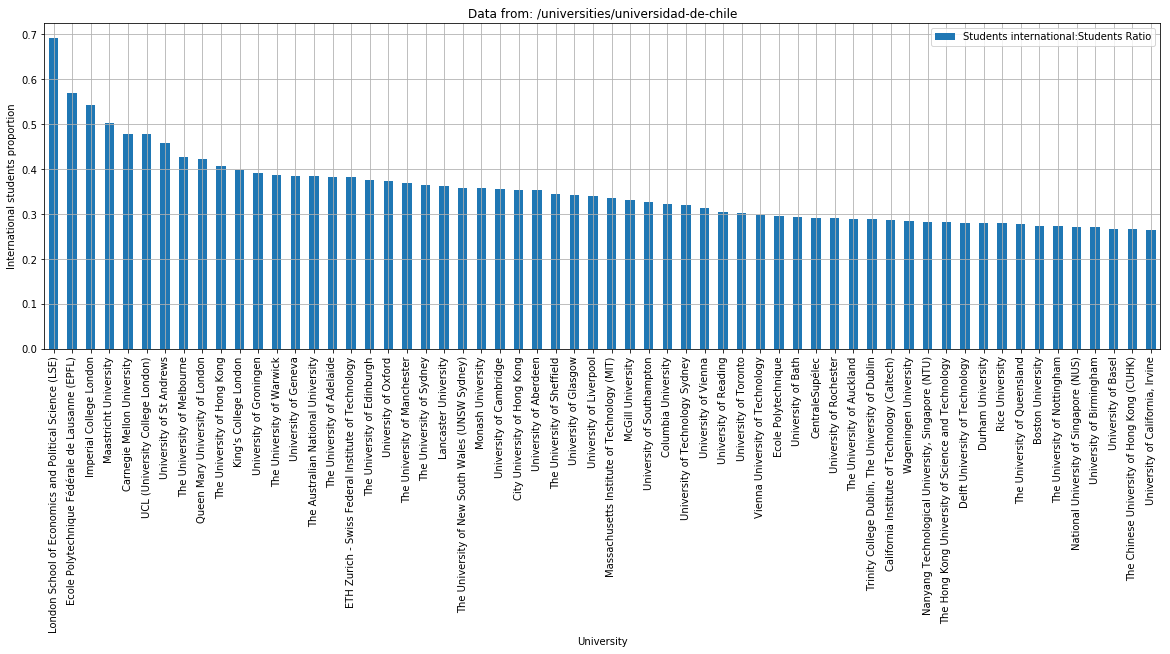

In [43]:
ax = dataQS.sort_values('Students international:Students Ratio', ascending=False).head(60).plot(y='Students international:Students Ratio', x='title', kind='bar', grid=True, figsize=(20, 6), title='Data from: ' + url)
ax.set_xlabel('University')
ax.set_ylabel('International students proportion')


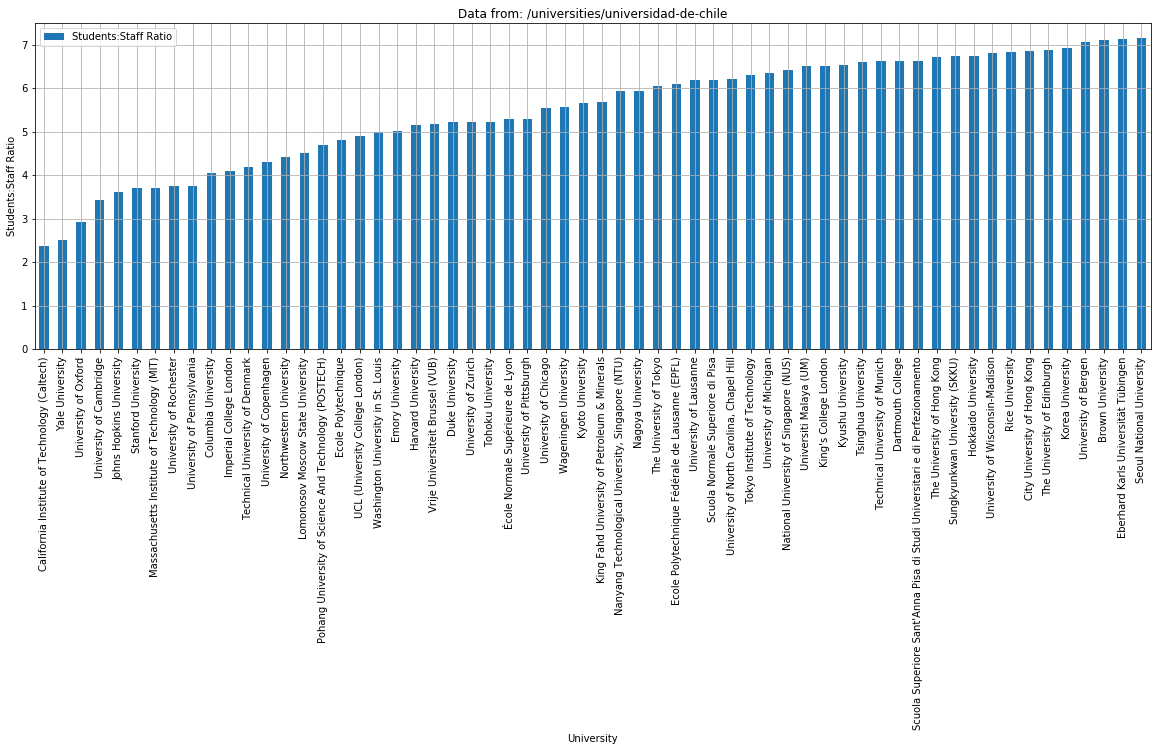

In [18]:

ax = dataQS.sort_values('Students:Staff Ratio', ascending=True).head(60).plot(y='Students:Staff Ratio', x='title', kind='bar', grid=True, figsize=(20, 6), title='Data from: ' + url)
ax.set_xlabel('University')
ax.set_ylabel('Students:Staff Ratio')

## Conclusion


# Times Higher Education University Ranking

Same schema go to : "https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json"

And we have the data at json format

In [21]:
url = "https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json"

r =  requests.get(url)
print(r.status_code)
import json
from io import StringIO
json = json.load(StringIO(r.text))
dataTHE = pd.DataFrame(json['data'])

200


In [22]:
dataTHE.drop("record_type",axis=1,inplace=True)
dataTHE.drop("aliases",axis=1,inplace=True)
dataTHE.drop("subjects_offered",axis=1,inplace=True)
dataTHE.drop("scores_teaching_rank",axis=1,inplace=True)
dataTHE.drop("scores_citations",axis=1,inplace=True)
dataTHE.drop("scores_industry_income",axis=1,inplace=True)
dataTHE.drop("scores_citations_rank",axis=1,inplace=True)
dataTHE.drop("scores_industry_income_rank",axis=1,inplace=True)
dataTHE.drop("scores_international_outlook",axis=1,inplace=True)
dataTHE.drop("scores_research",axis=1,inplace=True)
dataTHE.drop("scores_teaching",axis=1,inplace=True)
dataTHE.drop("scores_research_rank",axis=1,inplace=True)
dataTHE.drop("scores_international_outlook_rank",axis=1,inplace=True)

dataTHE.head()

,location,member_level,name,nid,rank,rank_order,scores_overall,scores_overall_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,url
0,United Kingdom,0,University of Oxford,468,1,10,94.3,10,46 : 54,"20,409",38%,11.2,/world-university-rankings/university-oxford
1,United Kingdom,0,University of Cambridge,470,2,20,93.2,20,45 : 55,"18,389",35%,10.9,/world-university-rankings/university-cambridge
2,United States,0,California Institute of Technology,128779,=3,30,93.0,30,31 : 69,"2,209",27%,6.5,/world-university-rankings/california-institut...
3,United States,11,Stanford University,467,=3,40,93.0,40,42 : 58,"15,845",22%,7.5,/world-university-rankings/stanford-university
4,United States,0,Massachusetts Institute of Technology,471,5,50,92.5,50,37 : 63,"11,177",34%,8.7,/world-university-rankings/massachusetts-insti...


Here we have already the ration, we just rename it

In [23]:
dataTHE.rename(columns={'stats_student_staff_ratio':'Students:Staff Ratio'}, inplace=True)
dataTHE.rename(columns={'stats_pc_intl_students':'Students international:Students Ratio'}, inplace=True)

In [24]:

dataTHE.head()

,location,member_level,name,nid,rank,rank_order,scores_overall,scores_overall_rank,stats_female_male_ratio,stats_number_students,Students international:Students Ratio,Students:Staff Ratio,url
0,United Kingdom,0,University of Oxford,468,1,10,94.3,10,46 : 54,"20,409",38%,11.2,/world-university-rankings/university-oxford
1,United Kingdom,0,University of Cambridge,470,2,20,93.2,20,45 : 55,"18,389",35%,10.9,/world-university-rankings/university-cambridge
2,United States,0,California Institute of Technology,128779,=3,30,93.0,30,31 : 69,"2,209",27%,6.5,/world-university-rankings/california-institut...
3,United States,11,Stanford University,467,=3,40,93.0,40,42 : 58,"15,845",22%,7.5,/world-university-rankings/stanford-university
4,United States,0,Massachusetts Institute of Technology,471,5,50,92.5,50,37 : 63,"11,177",34%,8.7,/world-university-rankings/massachusetts-insti...


Remove % from the ratio

In [25]:
dataTHE = dataTHE.head(200)
dataTHE['Students international:Students Ratio'] = dataTHE['Students international:Students Ratio'].apply(lambda x: int(x.split('%')[0]) / 100)
dataTHE['Students:Staff Ratio'] = pd.to_numeric(dataTHE['Students:Staff Ratio'])

In [26]:
top_international_students = dataTHE.sort_values('Students international:Students Ratio', ascending=False)
top_international_students.head()

,location,member_level,name,nid,rank,rank_order,scores_overall,scores_overall_rank,stats_female_male_ratio,stats_number_students,Students international:Students Ratio,Students:Staff Ratio,url
24,United Kingdom,0,London School of Economics and Political Science,511,=25,250,79.4,250,52 : 48,"10,065",0.71,12.2,/world-university-rankings/london-school-econo...
178,Luxembourg,6,University of Luxembourg,131698,=179,1790,53.8,1790,50 : 50,"4,969",0.57,14.6,/world-university-rankings/university-luxembourg
37,Switzerland,0,École Polytechnique Fédérale de Lausanne,510,=38,380,75.3,380,28 : 72,"9,928",0.55,11.2,/world-university-rankings/ecole-polytechnique...
7,United Kingdom,0,Imperial College London,472,8,80,89.2,80,37 : 63,"15,857",0.55,11.4,/world-university-rankings/imperial-college-lo...
102,Netherlands,6,Maastricht University,663,103,1030,60.4,1030,58 : 42,"16,727",0.50,18.0,/world-university-rankings/maastricht-university


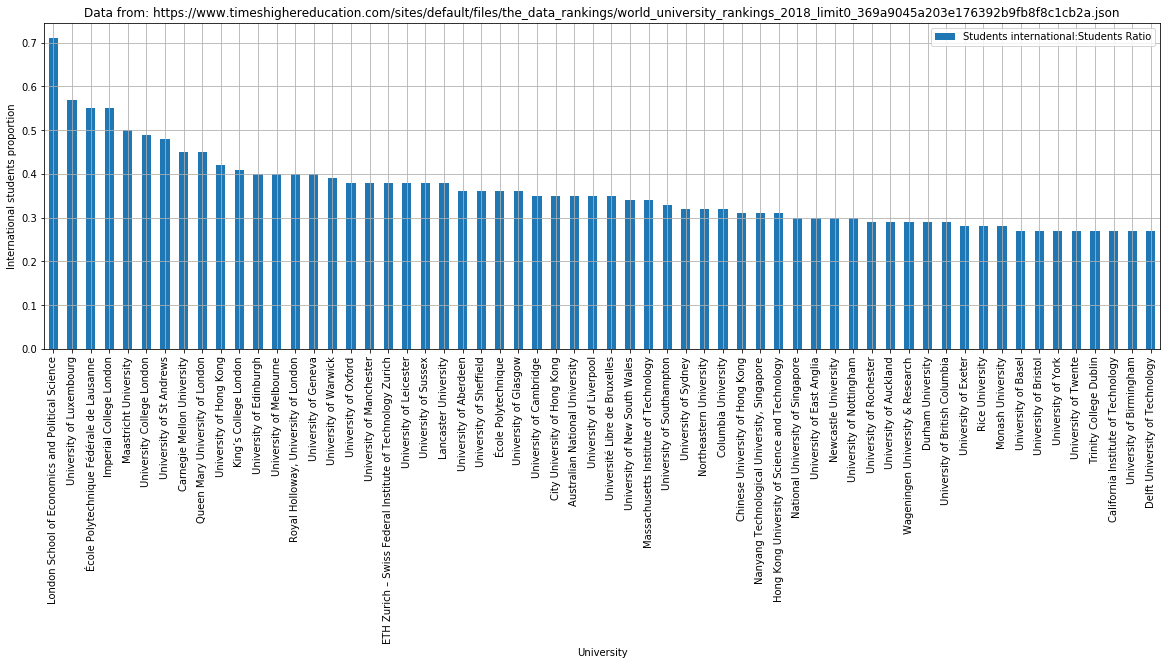

In [27]:
ax = top_international_students.head(60).plot(y='Students international:Students Ratio', x='name', kind='bar', grid=True, figsize=(20, 6), title='Data from: ' + url)
ax.set_xlabel('University')
ax.set_ylabel('International students proportion')

In [28]:
top_student_staff_ratio = dataTHE.sort_values('Students:Staff Ratio', ascending=True)
top_student_staff_ratio.head()

,location,member_level,name,nid,rank,rank_order,scores_overall,scores_overall_rank,stats_female_male_ratio,stats_number_students,Students international:Students Ratio,Students:Staff Ratio,url
105,United States,0,Vanderbilt University,534,=105,1060,60.0,1060,53 : 47,"12,011",0.13,3.3,/world-university-rankings/vanderbilt-university
109,Denmark,0,University of Copenhagen,599,=109,1100,59.4,1100,58 : 42,"30,395",0.14,4.1,/world-university-rankings/university-copenhagen
12,United States,0,Johns Hopkins University,478,13,130,86.5,130,52 : 48,"15,498",0.24,4.3,/world-university-rankings/johns-hopkins-unive...
11,United States,0,Yale University,475,12,120,87.6,120,49 : 51,"12,155",0.21,4.3,/world-university-rankings/yale-university
153,United States,0,University of Rochester,545,=153,1540,55.6,1540,49 : 51,"9,636",0.29,4.3,/world-university-rankings/university-rochester


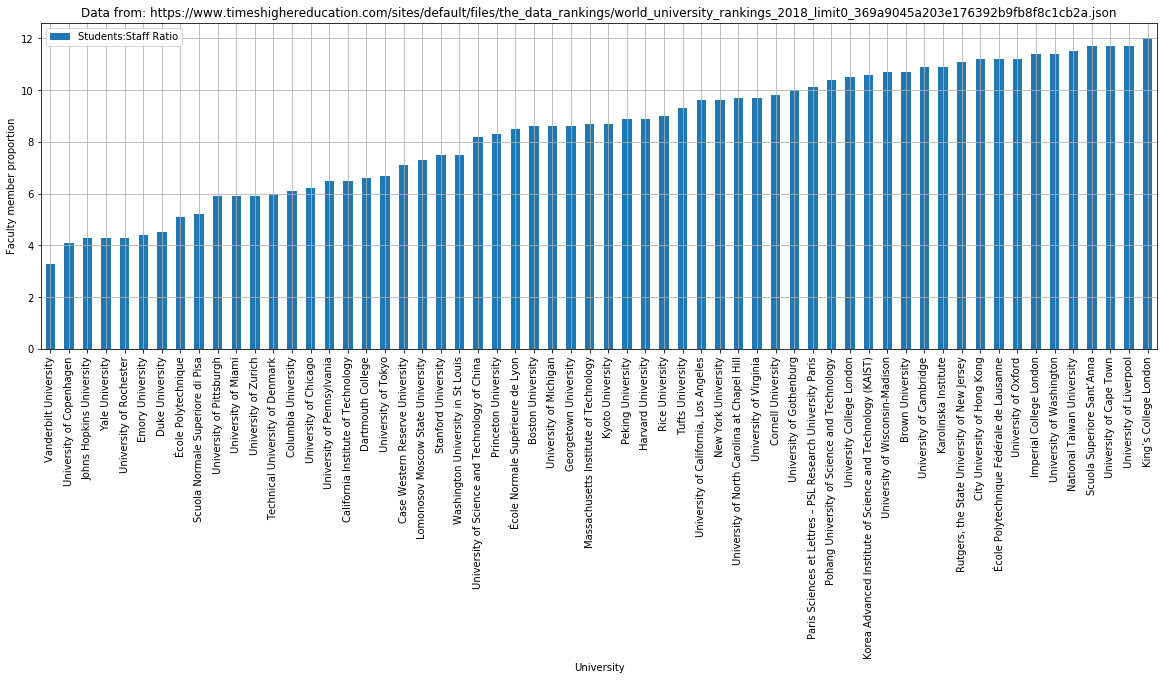

In [29]:
ax = top_student_staff_ratio.head(60).plot(y='Students:Staff Ratio', x='name', kind='bar', grid=True, figsize=(20, 6), title='Data from: ' + url)
ax.set_xlabel('University')
ax.set_ylabel('Faculty member proportion')

Conclusion
======


For number of internation student the two ranking seem in adequation.
But on number of staff, the two ranking dosesn't have the same ranking, they donsent count the same way.

# MERGING

For mergin we will merge on  name and country.
Probleme :in one calsmsment the university name are in english and in the other the name was in french,spanish ...

So we will use a algorithe of fuzzy token, we choose fuzz.token_sort_ratio, it work on sentency like "Université de Machin".
Moreover we translate some terms for a better efficienci:

Univedrsité -> University

Universitat -> University

We chossse a thresold of 82 afert some trying.

In [34]:
from fuzzywuzzy import fuzz
def get_closest_match(x, list_strings):
  """return for one x the best univity who match with the token_sort_ratio algorithme distance"""
  best_match = x
  highest_jw = 0

  for current_string in list_strings:
    current_score = fuzz.token_sort_ratio(x, current_string)
    # for each univertisy calcul the matchin score

    # use a minimal thresold and same country for be sure to have exactyle the same university
    if(current_score > highest_jw and  current_score>84): # thresold and country match
      if(dataTHEcpy.loc[dataTHEcpy.name==current_string].location.iloc[0] == dataQScpy.loc[dataQScpy.title==x].country.iloc[0] ) : 
          highest_jw = current_score
          best_match = current_string
        
    # for debugin purpose
  if("kong" in x):
        print(best_match)
        print(x)
        print(highest_jw)
  return best_match

# we work on copy of database
dataTHEcpy = dataTHE.copy()
dataQScpy = dataQS.copy()

dataTHEcpy.drop("url",axis=1,inplace=True)
dataQScpy.drop("url",axis=1,inplace=True)
dataTHEcpy.drop("scores_overall",axis=1,inplace=True)
dataTHEcpy.drop("stats_female_male_ratio",axis=1,inplace=True)
dataTHEcpy.drop("nid",axis=1,inplace=True)
dataTHEcpy.drop("member_level",axis=1,inplace=True)
dataQScpy.drop("nid",axis=1,inplace=True)

#make some translation
dataQScpy.title = dataQScpy.title.str.replace('Université', 'University')
dataQScpy.title = dataQScpy.title.str.replace('et ', 'and ')
dataQScpy.title = dataQScpy.title.str.replace('Universitat', 'University')
dataQScpy.title = dataQScpy.title.str.replace('Autònoma', 'Autonomous')


dataTHEcpy.rename(columns={'stats_number_students':'number of students'}, inplace=True) 

# apply the cslosent math on title , so we can merge title and name
dataQScpy.title = dataQScpy.title.map(lambda x: get_closest_match(x, dataTHEcpy.name))

# verify that theere are not two university who match one, ie theare a bug
print(len(dataQScpy.title.unique()))

# to the merging
merged = dataQScpy.merge(dataTHEcpy,how="outer",left_on="title",right_on="name")

# show university who dont have a equivalent in the orther rankikng
merged[merged.title.isnull() | merged.name.isnull() ]


200


,cc,country,rank_display,region,score,title,number of students_x,number of international students,number of faculty members,number of international faculty members,Students:Staff Ratio_x,Students international:Students Ratio_x,location,name,rank,rank_order,scores_overall_rank,number of students_y,Students international:Students Ratio_y,Students:Staff Ratio_y
42,FR,France,43,Europe,79.9,"Ecole normale supérieure, Paris",1907.0,374.0,178.0,75.0,10.713483,0.196120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,AU,Australia,45,Oceania,78.9,The University of New South Wales (UNSW Sydney),39784.0,14292.0,2924.0,1612.0,13.606019,0.359240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,JP,Japan,56,Asia,74.8,Tokyo Institute of Technology,9832.0,1071.0,1563.0,191.0,6.290467,0.108930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,JP,Japan,63,Asia,72.1,Osaka University,22760.0,2106.0,2814.0,296.0,8.088131,0.092531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,DE,Germany,66,Europe,70.8,Ludwig-Maximilians-Universität München,35055.0,5084.0,3274.0,674.0,10.707086,0.145029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,DE,Germany,68,Europe,70.4,Ruprecht-Karls-Universität Heidelberg,28852.0,5298.0,3908.0,756.0,7.382805,0.183627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,AR,Argentina,75,Latin America,69.1,Universidad de Buenos Aires (UBA),122301.0,27109.0,16421.0,3165.0,7.447841,0.221658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,JP,Japan,=76,Asia,69.0,Tohoku University,17827.0,1604.0,3411.0,264.0,5.226327,0.089976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,IE,Ireland,88,Europe,65.7,"Trinity College Dublin, The University of Dublin",14961.0,4311.0,1249.0,544.0,11.978383,0.288149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,KR,South Korea,=90,Asia,65.5,Korea University,25892.0,3638.0,3745.0,339.0,6.913752,0.140507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So we see that 51 university of www.topuniversities.com  dosent have a equivalent in  www.timeshighereducation.com
We can only hopping that University that have the same name have merging , we can't be sure a 100%.

Verify by exmple Cologne university:

In [44]:
print(dataQS[dataQS['title'].str.contains("Cologne")]["title"] )


Series([], Name: title, dtype: object)


In [45]:
print(dataTHE[dataTHE['name'].str.contains("Cologne")]["name"] )

144    University of Cologne
Name: name, dtype: object


Now get university of both ranking

In [46]:
mergednotnull = merged[~(merged.title.isnull() | merged.name.isnull()) ].copy()

In [47]:
mergednotnull

,cc,country,rank_display,region,score,title,number of students_x,number of international students,number of faculty members,number of international faculty members,Students:Staff Ratio_x,Students international:Students Ratio_x,location,name,rank,rank_order,scores_overall_rank,number of students_y,Students international:Students Ratio_y,Students:Staff Ratio_y
0,US,United States,1,North America,100.0,Massachusetts Institute of Technology,11067.0,3717.0,2982.0,1679.0,3.711268,0.335863,United States,Massachusetts Institute of Technology,5,50,50,"11,177",0.34,8.7
1,US,United States,2,North America,98.7,Stanford University,15878.0,3611.0,4285.0,2042.0,3.705484,0.227422,United States,Stanford University,=3,40,40,"15,845",0.22,7.5
2,US,United States,3,North America,98.4,Harvard University,22429.0,5266.0,4350.0,1311.0,5.156092,0.234785,United States,Harvard University,6,60,60,"20,326",0.26,8.9
3,US,United States,4,North America,97.7,California Institute of Technology,2255.0,647.0,953.0,350.0,2.366212,0.286918,United States,California Institute of Technology,=3,30,30,"2,209",0.27,6.5
4,GB,United Kingdom,5,Europe,95.6,University of Cambridge,18770.0,6699.0,5490.0,2278.0,3.418944,0.356899,United Kingdom,University of Cambridge,2,20,20,"18,389",0.35,10.9
5,GB,United Kingdom,6,Europe,95.3,University of Oxford,19720.0,7353.0,6750.0,2964.0,2.921481,0.372870,United Kingdom,University of Oxford,1,10,10,"20,409",0.38,11.2
6,GB,United Kingdom,7,Europe,94.6,University College London,31080.0,14854.0,6345.0,2554.0,4.898345,0.477928,United Kingdom,University College London,16,160,160,"30,304",0.49,10.5
7,GB,United Kingdom,8,Europe,93.7,Imperial College London,16090.0,8746.0,3930.0,2071.0,4.094148,0.543567,United Kingdom,Imperial College London,8,80,80,"15,857",0.55,11.4
8,US,United States,9,North America,93.5,University of Chicago,13557.0,3379.0,2449.0,635.0,5.535729,0.249244,United States,University of Chicago,9,90,90,"13,525",0.25,6.2
9,CH,Switzerland,10,Europe,93.3,ETH Zurich – Swiss Federal Institute of Techno...,19815.0,7563.0,2477.0,1886.0,7.999596,0.381681,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,=10,100,100,"19,233",0.38,14.6


In [48]:
#Cleaning
mergednotnull.drop("name",axis=1,inplace=True)
mergednotnull.drop("rank",axis=1,inplace=True)
mergednotnull.drop("scores_overall_rank",axis=1,inplace=True)
mergednotnull.drop("location",axis=1,inplace=True)
mergednotnull

,cc,country,rank_display,region,score,title,number of students_x,number of international students,number of faculty members,number of international faculty members,Students:Staff Ratio_x,Students international:Students Ratio_x,rank_order,number of students_y,Students international:Students Ratio_y,Students:Staff Ratio_y
0,US,United States,1,North America,100.0,Massachusetts Institute of Technology,11067.0,3717.0,2982.0,1679.0,3.711268,0.335863,50,"11,177",0.34,8.7
1,US,United States,2,North America,98.7,Stanford University,15878.0,3611.0,4285.0,2042.0,3.705484,0.227422,40,"15,845",0.22,7.5
2,US,United States,3,North America,98.4,Harvard University,22429.0,5266.0,4350.0,1311.0,5.156092,0.234785,60,"20,326",0.26,8.9
3,US,United States,4,North America,97.7,California Institute of Technology,2255.0,647.0,953.0,350.0,2.366212,0.286918,30,"2,209",0.27,6.5
4,GB,United Kingdom,5,Europe,95.6,University of Cambridge,18770.0,6699.0,5490.0,2278.0,3.418944,0.356899,20,"18,389",0.35,10.9
5,GB,United Kingdom,6,Europe,95.3,University of Oxford,19720.0,7353.0,6750.0,2964.0,2.921481,0.372870,10,"20,409",0.38,11.2
6,GB,United Kingdom,7,Europe,94.6,University College London,31080.0,14854.0,6345.0,2554.0,4.898345,0.477928,160,"30,304",0.49,10.5
7,GB,United Kingdom,8,Europe,93.7,Imperial College London,16090.0,8746.0,3930.0,2071.0,4.094148,0.543567,80,"15,857",0.55,11.4
8,US,United States,9,North America,93.5,University of Chicago,13557.0,3379.0,2449.0,635.0,5.535729,0.249244,90,"13,525",0.25,6.2
9,CH,Switzerland,10,Europe,93.3,ETH Zurich – Swiss Federal Institute of Techno...,19815.0,7563.0,2477.0,1886.0,7.999596,0.381681,100,"19,233",0.38,14.6


Corelation
======

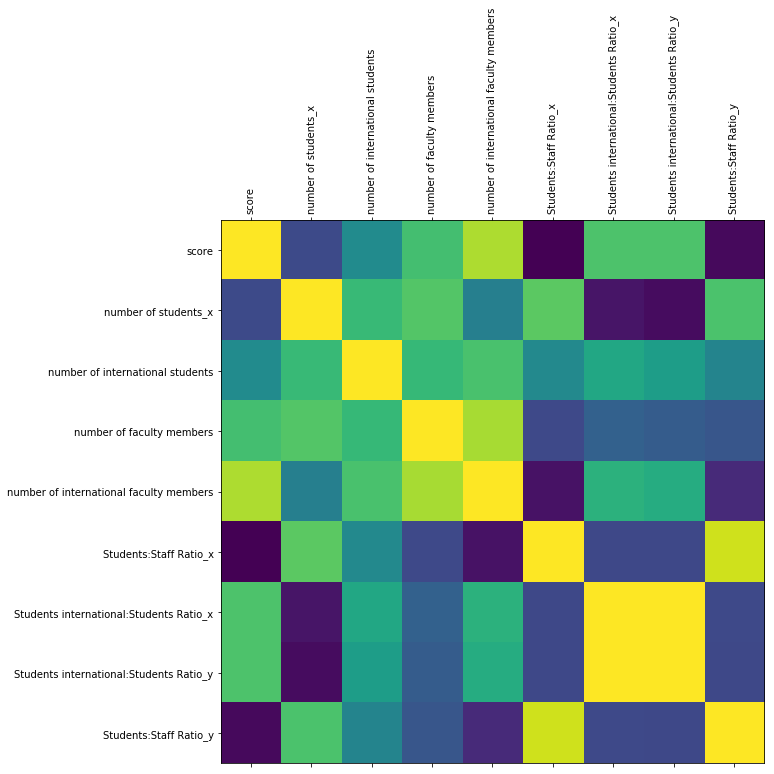

In [55]:
import matplotlib.pyplot as plt


def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(mergednotnull.corr())


When a university have a good international student ration , is the same for internationale staff.



In [ ]:
https://en.wikipedia.org/wiki/Schulze_method